In [1]:
import pandas as pd
import os

project_root = os.getcwd()  # Get the directory of this script
data_path = os.path.join(project_root, "../data/creditcard.csv")
df = pd.read_csv(data_path)

mean_amount = df['Amount'].mean()
print(f'mean amount: {mean_amount}')

null = df.isnull().sum()
print(f'number of missing values: \n{null}')

print(f'number of fraud transactions: {(df['Class'] == 1).sum()}')
print(f'percent of transactions that are fraudulent: {((df['Class'] == 1).sum())/df.shape[0]*100}')

mean amount: 88.34961925093133
number of missing values: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
number of fraud transactions: 492
percent of transactions that are fraudulent: 0.1727485630620034


Summary of data:

1. the mean value of transactions is 88.35
2. there are no missing values
3. number of fraudulent transactions is 492 (0.17% of transactions) → dataset is imbalanced

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

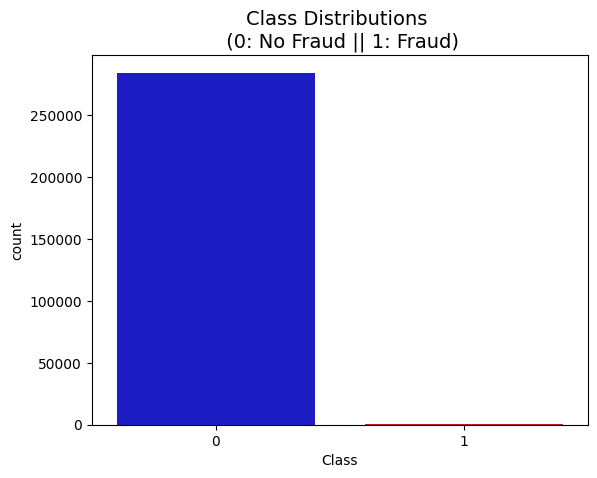

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', hue='Class', data=df, palette=colors, legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Plot to show number of non-fraud vs fraud transactions

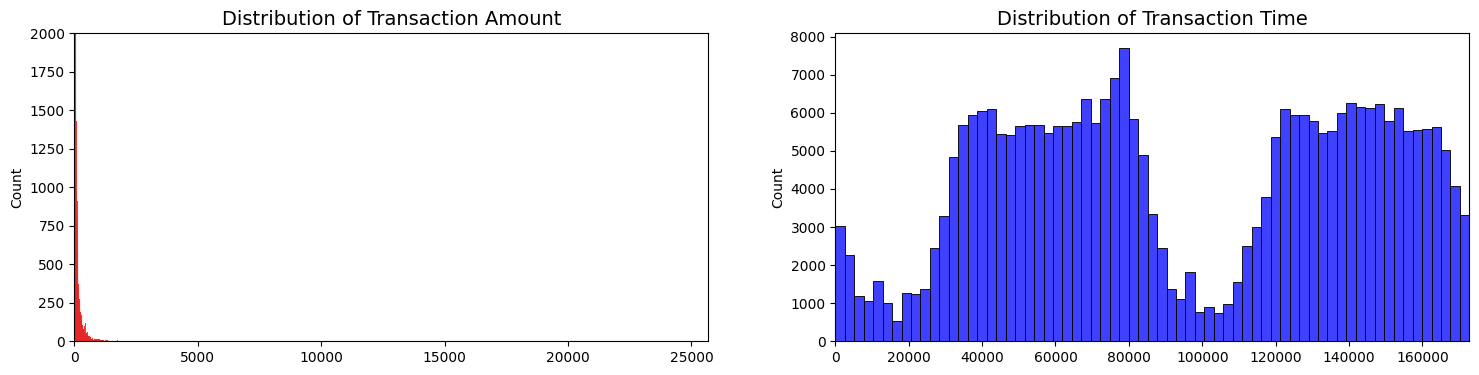

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_ylim(0,2000)

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


By seeing the distributions we can have an idea how skewed are these features. There are techniques that can help the distributions be less skewed which will be implemented in the future

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


scaled the Time and Amount columns in order to prevent them from dominating the model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Preparing dataset for machine learning by splitting it into training and testing sets while preserving the class distribution

In [6]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
168337,1.825613,0.405115,-5.337834,-0.130050,-1.029155,-2.533053,-4.279361,-0.412656,-2.191772,2.570605,...,-0.215522,0.068537,0.120633,-0.941871,-0.060449,0.591553,-0.065416,0.238952,-0.204093,0
149577,-0.293440,0.080006,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,...,-0.006388,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1
227351,0.620694,0.708972,1.957447,-1.033843,-0.499328,-0.369653,-0.997373,-0.154304,-0.861842,0.071152,...,-0.525730,-0.521485,-1.072650,0.381573,-0.498394,-0.585058,-0.660475,0.041602,-0.031423,0
151196,7.678055,0.120537,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1
6472,-0.293440,-0.904052,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,...,0.204138,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1


Here, we balance the dataset by selecting all 492 fraud cases and randomly under-sampling the non-fraud cases to also include only 492, creating a 50/50 class split. then we shuffle this new balanced dataset to prepare it for training, reducing bias from the original order.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


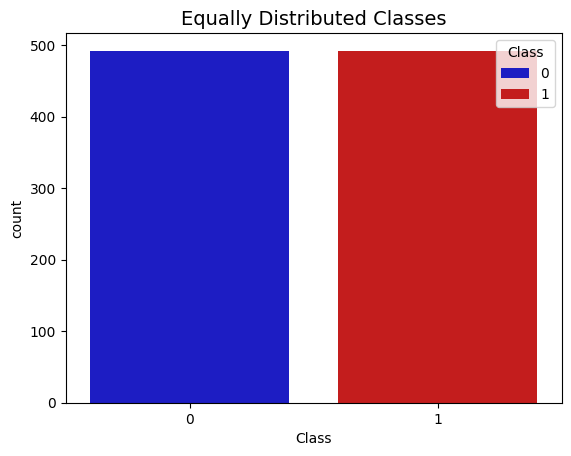

In [7]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', hue='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

New balanced dataset

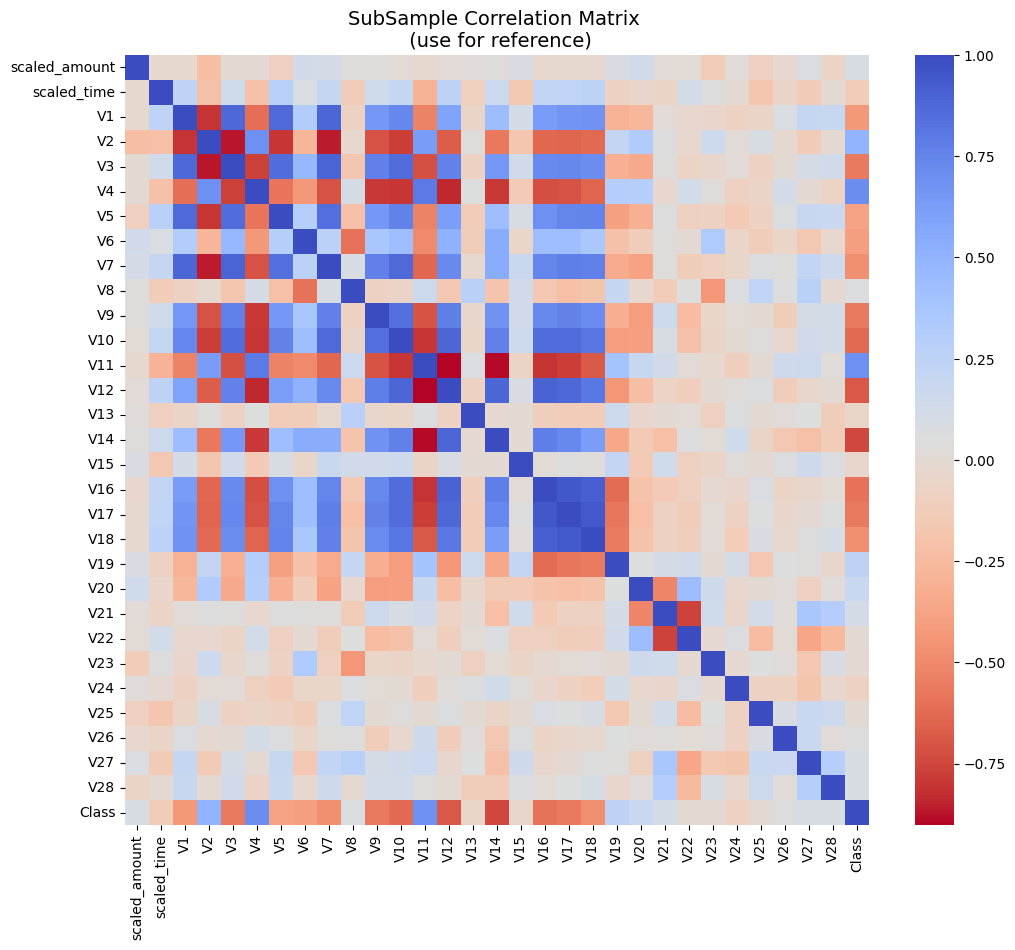

In [8]:
plt.figure(figsize=(12,10))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 16})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Observations from heat map of the correlation matrix:

1. Negative correlations: V10, V12, V14, and V17 are all negatively correlated. The cells that correspond to the intersection of "Class" with these variables are red. This indicates that the lower these values are, the more likely the end result will be a fraud transaction.

2. Positive correlations: V2, V4, V11, and V19 are all positively correlated. The cells that correspond to the intersection of "Class" with these variables are blue. This indicates that the higher these values are, the more likely the end result will be a fraud transaction.

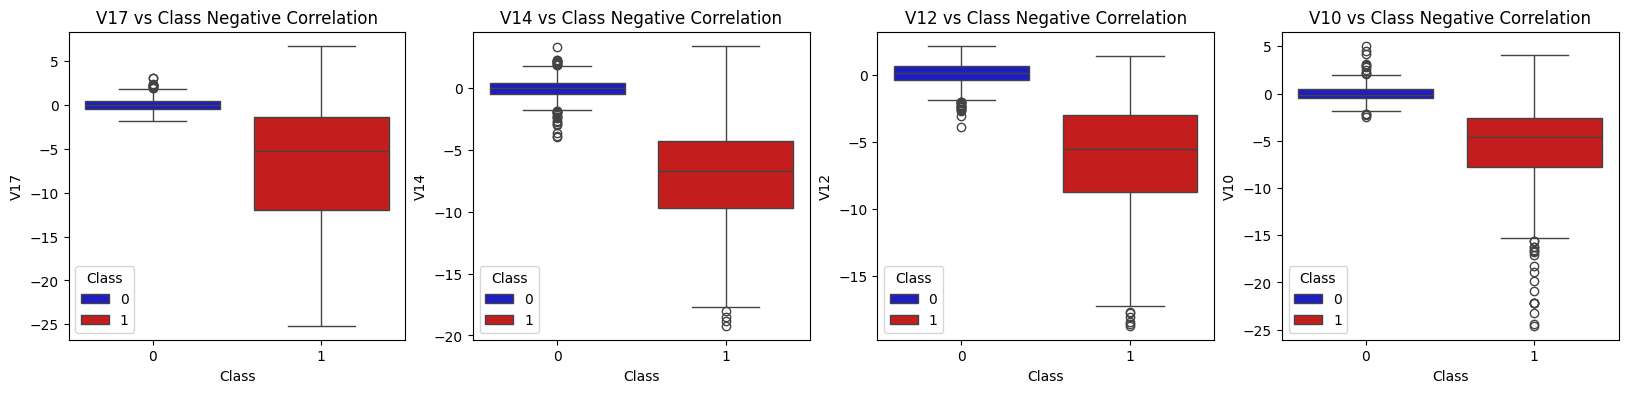

In [9]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", hue = "Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", hue = "Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", hue = "Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", hue = "Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

We can see that these box and whisker plots confirm what we observed in the correlation matrix. The box plots for V17, V14, V12, and V10 clearly show that the values of these features tend to be lower for fraudulent transactions (Class = 1) compared to legitimate ones (Class = 0). This visual difference in the distributions supports the previously stated negative correlation between these "V" features and the likelihood of a transaction being fraudulent.

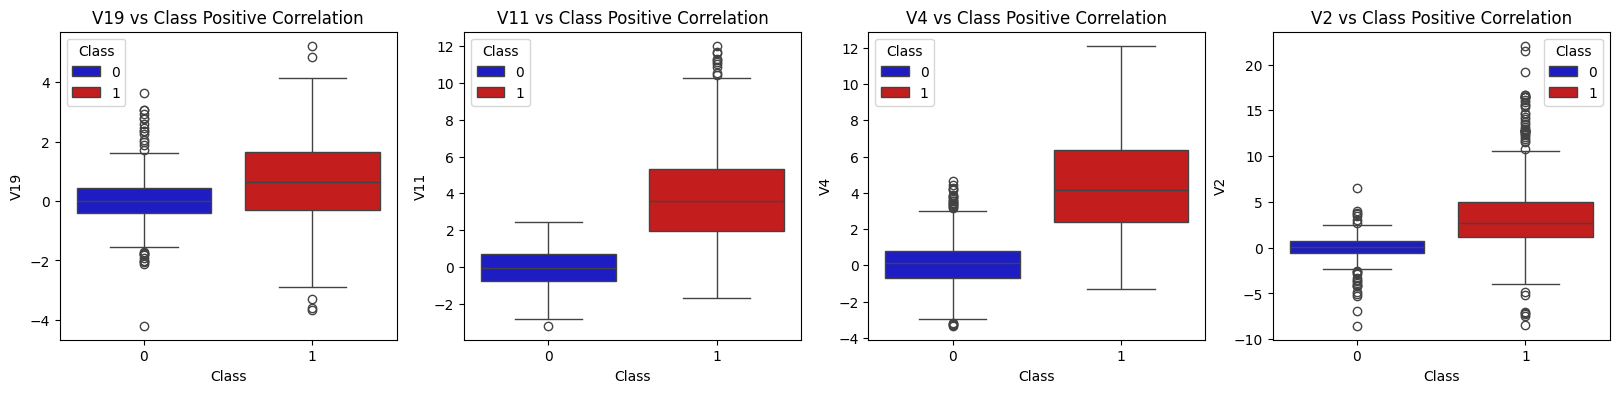

In [10]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", hue = "Class", y="V19", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V19 vs Class Positive Correlation')

sns.boxplot(x="Class", hue = "Class", y="V11", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", hue = "Class", y="V4", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", hue = "Class", y="V2", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V2 vs Class Positive Correlation')

plt.show()

We can see that these box and whisker plots confirm what we observed in the correlation matrix. The box plots for V19, V11, V4, and V2 clearly show that the values of these features tend to be higher for fraudulent transactions (Class = 1) compared to legitimate ones (Class = 0). This visual difference in the distributions supports the previously stated positive correlation between these "V" features and the likelihood of a transaction being fraudulent.

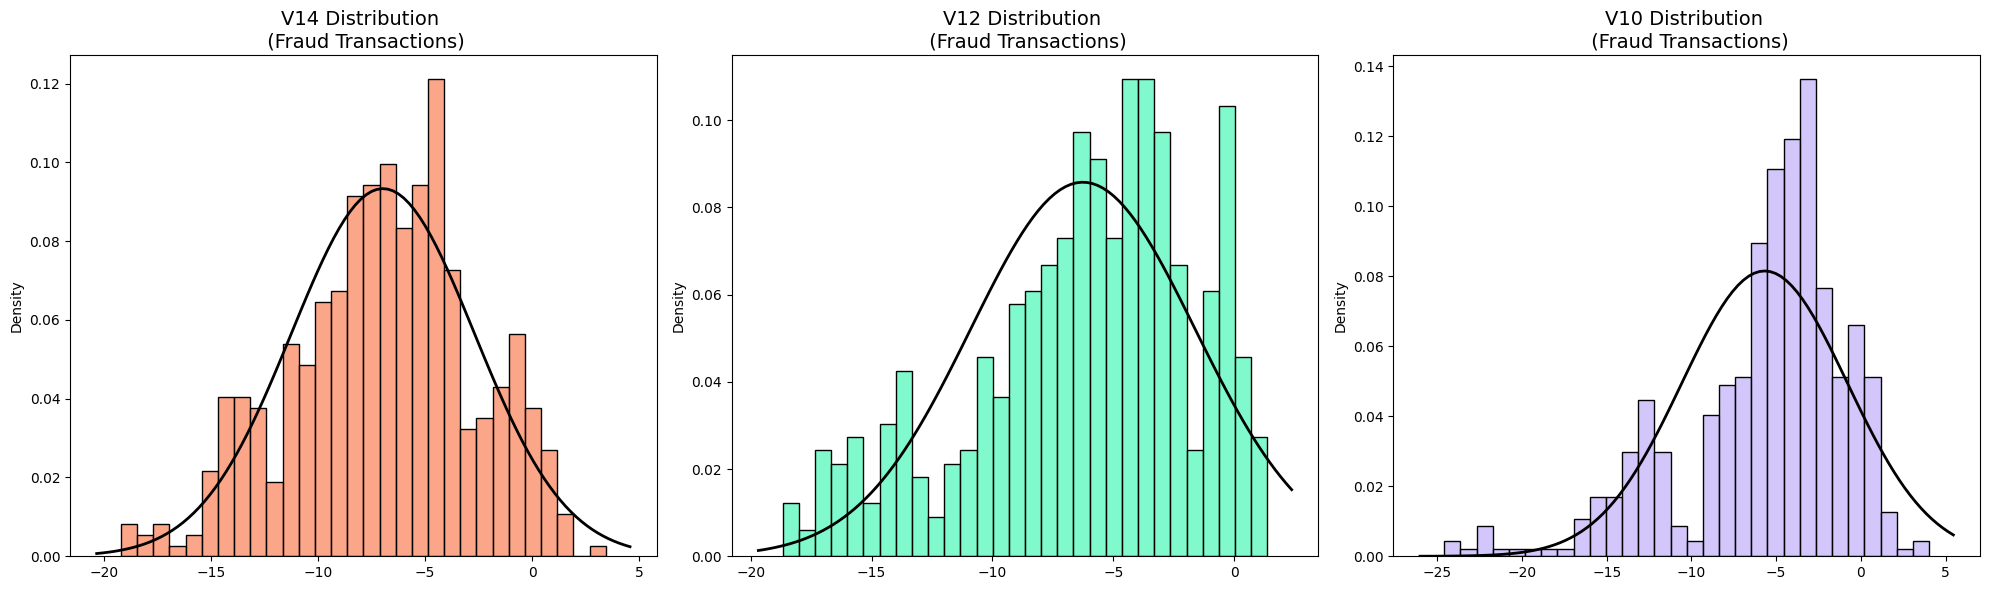

In [11]:
from scipy.stats import norm
import numpy as np

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_data = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_data, ax=ax1, stat='density', bins=30, color='#FB8861')
mu, std = norm.fit(v14_data)
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_data = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_data, ax=ax2, stat='density', bins=30, color='#56F9BB')
mu, std = norm.fit(v12_data)
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'k', linewidth=2)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_data = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_data, ax=ax3, stat='density', bins=30, color='#C5B3F9')
mu, std = norm.fit(v10_data)
xmin, xmax = ax3.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax3.plot(x, p, 'k', linewidth=2)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
# ----> V14 outlier removal
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25_v14, q75_v14 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
iqr_v14 = q75_v14 - q25_v14
cut_off_v14 = iqr_v14 * 1.5
lower_v14, upper_v14 = q25_v14 - cut_off_v14, q75_v14 + cut_off_v14

print(f"V14 -> Q25: {q25_v14:.4f}, Q75: {q75_v14:.4f}, IQR: {iqr_v14:.4f}")
print(f"V14 -> Lower: {lower_v14:.4f}, Upper: {upper_v14:.4f}, Cut-Off: {cut_off_v14:.4f}")

v14_outliers = [float(x) for x in v14_fraud if x < lower_v14 or x > upper_v14]
print(f"V14 -> Outliers Count: {len(v14_outliers)}")
print(f"V14 -> Outlier Values: {v14_outliers}")

new_df = new_df.drop(new_df[(new_df['V14'] < lower_v14) | (new_df['V14'] > upper_v14)].index)
print(f"V14 -> Remaining Rows After Removal: {len(new_df)}")
print("\n")


# ----> V12 outlier removal
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25_v12, q75_v12 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
iqr_v12 = q75_v12 - q25_v12
cut_off_v12 = iqr_v12 * 1.5
lower_v12, upper_v12 = q25_v12 - cut_off_v12, q75_v12 + cut_off_v12

print(f"V12 -> Q25: {q25_v12:.4f}, Q75: {q75_v12:.4f}, IQR: {iqr_v12:.4f}")
print(f"V12 -> Lower: {lower_v12:.4f}, Upper: {upper_v12:.4f}, Cut-Off: {cut_off_v12:.4f}")

v12_outliers = [float(x) for x in v12_fraud if x < lower_v12 or x > upper_v12]
print(f"V12 -> Outliers Count: {len(v12_outliers)}")
print(f"V12 -> Outlier Values: {v12_outliers}")

new_df = new_df.drop(new_df[(new_df['V12'] < lower_v12) | (new_df['V12'] > upper_v12)].index)
print(f"V12 -> Remaining Rows After Removal: {len(new_df)}")
print("\n")


# ----> V10 outlier removal
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25_v10, q75_v10 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
iqr_v10 = q75_v10 - q25_v10
cut_off_v10 = iqr_v10 * 1.5
lower_v10, upper_v10 = q25_v10 - cut_off_v10, q75_v10 + cut_off_v10

print(f"V10 -> Q25: {q25_v10:.4f}, Q75: {q75_v10:.4f}, IQR: {iqr_v10:.4f}")
print(f"V10 -> Lower: {lower_v10:.4f}, Upper: {upper_v10:.4f}, Cut-Off: {cut_off_v10:.4f}")

v10_outliers = [float(x) for x in v10_fraud if x < lower_v10 or x > upper_v10]
print(f"V10 -> Outliers Count: {len(v10_outliers)}")
print(f"V10 -> Outlier Values: {v10_outliers}")

new_df = new_df.drop(new_df[(new_df['V10'] < lower_v10) | (new_df['V10'] > upper_v10)].index)
print(f"V10 -> Remaining Rows After Removal: {len(new_df)}")
print("\n")

V14 -> Q25: -9.6927, Q75: -4.2828, IQR: 5.4099
V14 -> Lower: -17.8076, Upper: 3.8320, Cut-Off: 8.1149
V14 -> Outliers Count: 4
V14 -> Outlier Values: [-18.4937733551053, -18.0499976898594, -18.8220867423816, -19.2143254902614]
V14 -> Remaining Rows After Removal: 980


V12 -> Q25: -8.6730, Q75: -2.8930, IQR: 5.7800
V12 -> Lower: -17.3430, Upper: 5.7770, Cut-Off: 8.6700
V12 -> Outliers Count: 4
V12 -> Outlier Values: [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
V12 -> Remaining Rows After Removal: 976


V10 -> Q25: -7.4667, Q75: -2.5119, IQR: 4.9548
V10 -> Lower: -14.8989, Upper: 4.9203, Cut-Off: 7.4322
V10 -> Outliers Count: 27
V10 -> Outlier Values: [-16.6496281595399, -22.1870885620007, -15.5637913387301, -17.1415136412892, -15.2399619587112, -15.2318333653018, -16.2556117491401, -22.1870885620007, -15.2399619587112, -20.9491915543611, -16.3035376590131, -18.2711681738888, -18.9132433348732, -22.1870885620007, -15.1237521803455, -14.9246547735487, -24.

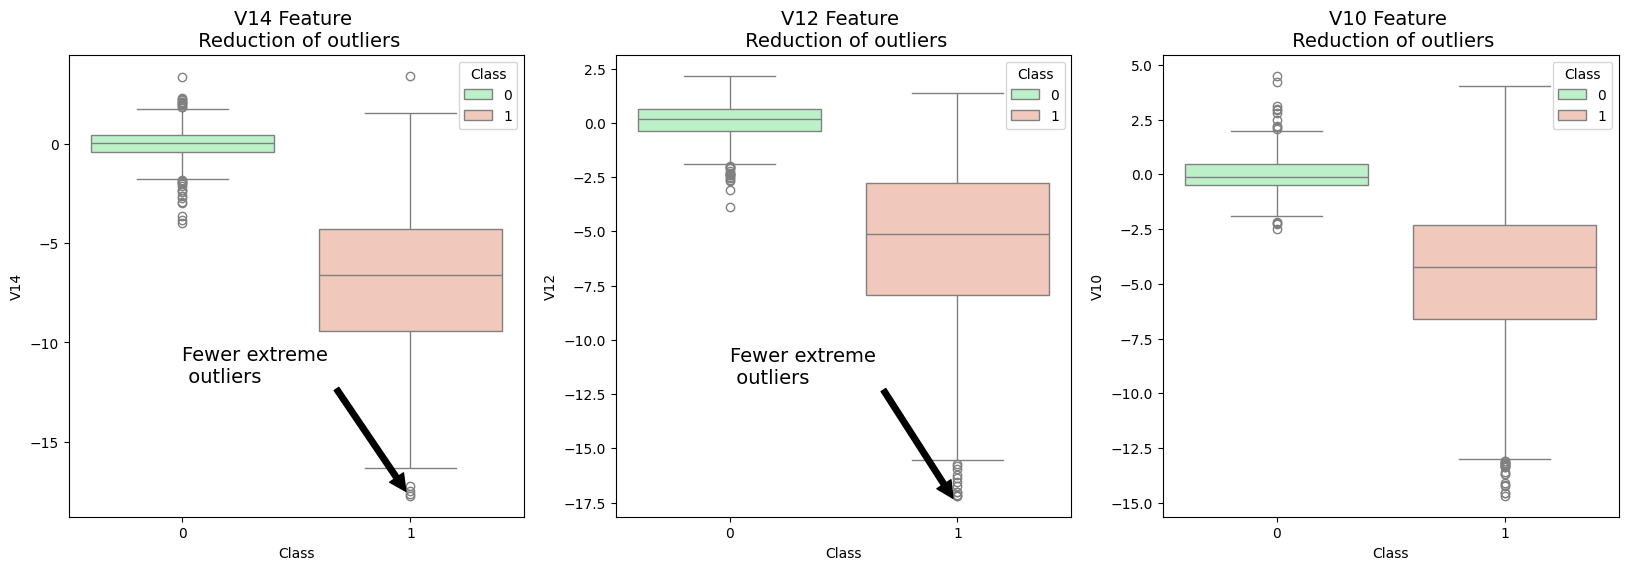

In [13]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x="Class", hue="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

sns.boxplot(x="Class", hue="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

sns.boxplot(x="Class", hue="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

t-SNE algorithm can  accurately cluster the cases that were fraud and non-fraud in our dataset.
This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases

In [14]:
from sklearn.manifold import TSNE
import time
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.8 s
PCA took 0.0051 s
Truncated SVD took 0.0015 s


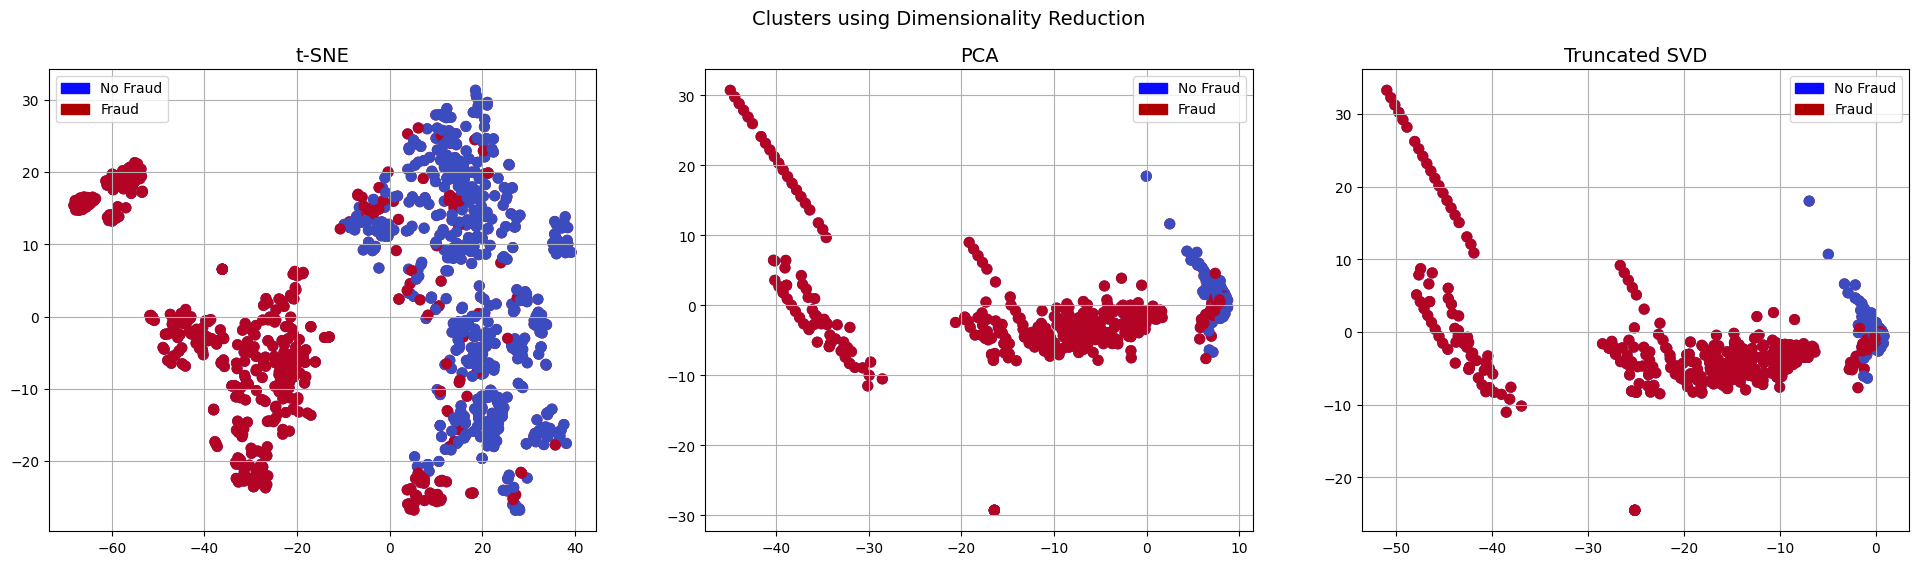

In [15]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

t-SNE shows a pretty accurate cluster of the cases that were fraud vs non-fraud. This tells us that the our predictive modeling will preform well.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


Training accuracy is a decent indication of how well the model performs on the same data it was trained on. Logistic Regression has the best accuracy score, so we will use it

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(max_iter=5000, solver='liblinear'), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.2%
Knears Neighbors Cross Validation Score 91.95%
Support Vector Classifier Cross Validation Score 94.2%
DecisionTree Classifier Cross Validation Score 91.82%


Cross-Validation accuracy is a good indication of how well the model will perform on new, unseen data. Logistic rergression and SVC performed the best

In [19]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56468  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56960 56961 56962]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56468  56963  56964 ... 113921 113922 114352]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113923 113924 113925 ... 170886 170887 170888]
Train: [     0      1      2 ... 284804 284805 284806] Test: [169548 170478 170598 ... 231114 231143 231634]
Train: [     0      1      2 ... 231114 231143 231634] Test: [227837 227838 227839 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


Nearmiss undersampling keeps all fraud cases and selects non-fraud cases that are closest in feature space to the fraud cases. therefore, nearmiss is better than manual undersampling becasue it looks at the non-fraud cases that look most similar to fraud/

The output displays the training and testing indices used in each fold of stratified cross-validation, which ensures that class distributions are preserved across splits. After applying the NearMiss undersampling technique, the training data becomes balanced, with 492 instances of each class (fraud and non-fraud), allowing the model to learn from an equal representation of both classes.